<a href="https://colab.research.google.com/github/Somya1911/PA-HW3/blob/main/PA_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


# Import the data

In [4]:
from google.colab import files
uploaded = files.upload()  # if using manual upload

  # Replace with the actual file name


Saving Breast Cancer Dataset HW3.csv to Breast Cancer Dataset HW3.csv


In [5]:
# Load data into DataFrame
df = pd.read_csv("Breast Cancer Dataset HW3.csv")

# Data Overview

In [4]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3823 non-null   float64
 1   Race                    3622 non-null   object 
 2   Marital Status          3703 non-null   object 
 3   T Stage                 4024 non-null   object 
 4   N Stage                 4024 non-null   object 
 5   6th Stage               4024 non-null   object 
 6   differentiate           4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              3622 non-null   float64
 10  Estrogen Status         3823 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  3421 non-null   float64
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

,0
Age,201
Race,402
Marital Status,321
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,402


# Plotting to identify outliers

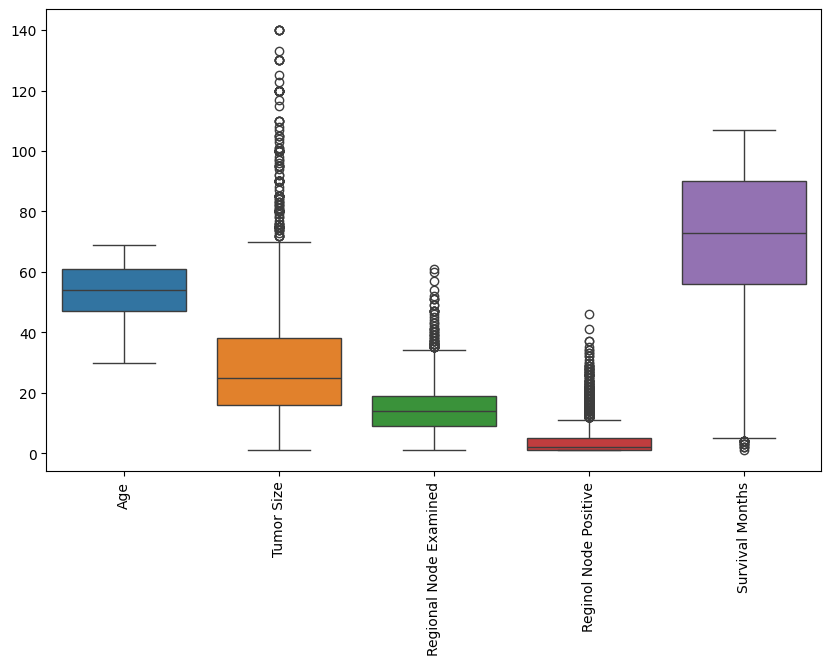

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


# Handling Outliers

In [7]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate IQR for numeric columns
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers in numeric columns only
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]



# Plotting again to check it outliers gone

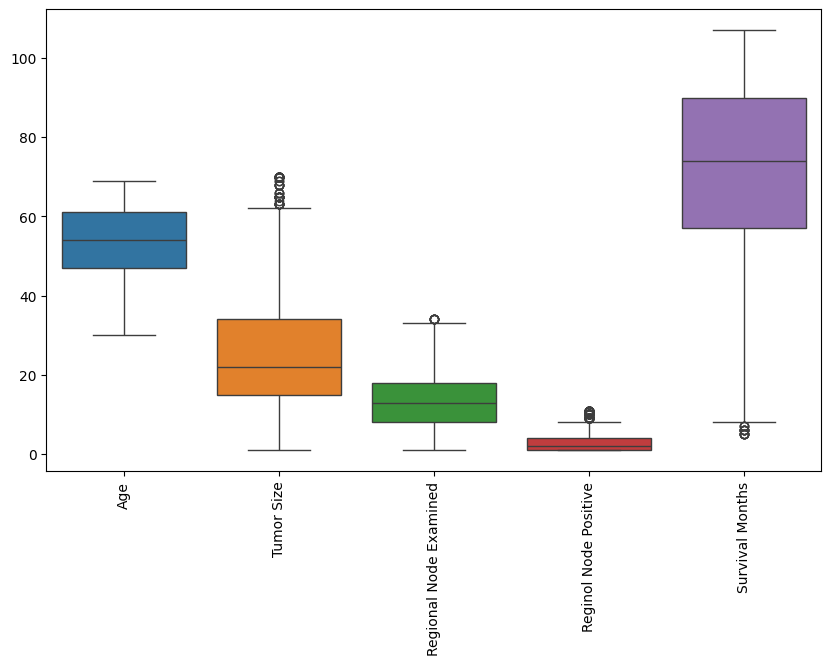

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

The updated boxplot shows that outliers have been reduced in some features, like Regional Node Examined and Regional Node Positive, but there are still a few remaining. This is expected, as the IQR method may leave a few extreme points that are still within a reasonable range.

In some cases, especially with medical data, certain outliers may contain valuable information and should not be removed completely.

# Imputing missing values

In [9]:
# Impute missing values with median for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns
df.loc[:, numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [10]:
# Impute missing values with mode for categorical columns only
categorical_cols = df.select_dtypes(include=['object']).columns
for column in categorical_cols:
    df.loc[:, column] = df[column].fillna(df[column].mode()[0])


# Normalize

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize Age and Tumor Size
standardize_cols = ['Age', 'Tumor Size']
scaler = StandardScaler()
df[standardize_cols] = scaler.fit_transform(df[standardize_cols])

# Normalize Regional Node Examined and Reginol Node Positive
normalize_cols = ['Regional Node Examined', 'Reginol Node Positive']
minmax_scaler = MinMaxScaler()
df[normalize_cols] = minmax_scaler.fit_transform(df[normalize_cols])


# Encoding categorical columns

In [12]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols)


# Check for remaining missing values

In [13]:
print(df.isnull().sum())  # Check for any remaining missing values
print(df.head())  # Display the first few rows to inspect preprocessing


Age                                        0
Tumor Size                                 0
Regional Node Examined                     0
Reginol Node Positive                      0
Survival Months                            0
Race_Black                                 0
Race_Other                                 0
Race_White                                 0
Marital Status_Divorced                    0
Marital Status_Married                     0
Marital Status_Separated                   0
Marital Status_Single                      0
Marital Status_Widowed                     0
T Stage _T1                                0
T Stage _T2                                0
T Stage _T3                                0
T Stage _T4                                0
N Stage_N1                                 0
N Stage_N2                                 0
N Stage_N3                                 0
6th Stage_IIA                              0
6th Stage_IIB                              0
6th Stage_

In [16]:
# Define the target variable
y = df['Status_Alive']  # Alive = 1, Dead = 0


In [17]:
# Define feature set by dropping the status columns
X = df.drop(columns=['Status_Alive', 'Status_Dead'])


# Feature Ranking and performing PCA

In [18]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# Feature Ranking
mi_scores = mutual_info_classif(X, y, random_state=0)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)
top_features = mi_scores_series.head(10).index  # Select top 10 features

# Select Top Features and Apply PCA
X_top = X[top_features]
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_top)


In [15]:
print(df.columns)


Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Race_Black', 'Race_Other', 'Race_White',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Separated', 'Marital Status_Single ',
       'Marital Status_Widowed', 'T Stage _T1', 'T Stage _T2', 'T Stage _T3',
       'T Stage _T4', 'N Stage_N1', 'N Stage_N2', 'N Stage_N3',
       '6th Stage_IIA', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB',
       '6th Stage_IIIC', 'differentiate_Moderately differentiated',
       'differentiate_Poorly differentiated', 'differentiate_Undifferentiated',
       'differentiate_Well differentiated', 'Grade_ anaplastic; Grade IV',
       'Grade_1', 'Grade_2', 'Grade_3', 'A Stage_Distant', 'A Stage_Regional',
       'Estrogen Status_Negative', 'Estrogen Status_Positive',
       'Progesterone Status_Negative', 'Progesterone Status_Positive',
       'Status_Alive', 'Status_Dead'],
      dtype='object')


In [20]:
# Reset the indices of X and y to ensure they are aligned
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)



In [22]:
# Ensure X and y are DataFrames/Series for checking indices
if isinstance(X_train, pd.DataFrame) or isinstance(X_train, pd.Series):
    print("X_train indices:", X_train.index)
if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
    print("y_train indices:", y_train.index)


y_train indices: Index([3737, 3535,  727, 1621, 1498,   84, 3159,   35, 1976,  823,
       ...
        328, 1209, 3984, 2001,  890,  981, 3784, 1916, 3038, 3178],
      dtype='int64', length=2772)


In [23]:
# Ensure X and y are aligned and converted to NumPy arrays if needed
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

# Continue with the modeling as normal


In [25]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)


In [26]:
X_values = X.values
y_values = y.values


In [27]:
from sklearn.model_selection import train_test_split

# Using values directly for the split
X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=0)


In [30]:
import numpy as np
from collections import Counter

# Define a function for the KNN algorithm
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        # Compute the Euclidean distance between the test point and all training points
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))

        # Get the labels of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Determine the most common label
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

# Use train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Predict using custom KNN
y_pred_knn = knn(X_train, y_train, X_test, k=5)



UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('bool'), dtype('<U3')) -> None

In [31]:
print(X_train.dtypes)
print(X_test.dtypes)


Age                                        float64
Tumor Size                                 float64
Regional Node Examined                     float64
Reginol Node Positive                      float64
Survival Months                              int64
Race_Black                                    bool
Race_Other                                    bool
Race_White                                    bool
Marital Status_Divorced                       bool
Marital Status_Married                        bool
Marital Status_Separated                      bool
Marital Status_Single                         bool
Marital Status_Widowed                        bool
T Stage _T1                                   bool
T Stage _T2                                   bool
T Stage _T3                                   bool
T Stage _T4                                   bool
N Stage_N1                                    bool
N Stage_N2                                    bool
N Stage_N3                     

In [32]:
# Convert all boolean columns to int (0 and 1)
X_train = X_train.astype(int)
X_test = X_test.astype(int)


In [33]:
# Predict using the custom KNN function
y_pred_knn = knn(X_train.values, y_train.values, X_test.values, k=5)


In [34]:
 # Print the first few predictions to verify
print("KNN Predictions:", y_pred_knn[:10])  # Print the first 10 predictions


KNN Predictions: [False, True, False, True, True, True, True, True, True, True]


# KNN

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate KNN model performance
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - Precision:", precision_score(y_test, y_pred_knn, pos_label=1))
print("KNN - Recall:", recall_score(y_test, y_pred_knn, pos_label=1))
print("KNN - F1 Score:", f1_score(y_test, y_pred_knn, pos_label=1))


KNN - Accuracy: 0.898989898989899
KNN - Precision: 0.9245283018867925
KNN - Recall: 0.9639344262295082
KNN - F1 Score: 0.9438202247191011


# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)


# C4.5 Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0)  # C4.5 uses information gain (entropy)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


# Random Forest

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0)  # C4.5 uses information gain (entropy)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)


# Neural Networks

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and convert probabilities to binary outcomes
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int).flatten()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8720 - loss: 0.3299 - val_accuracy: 0.8811 - val_loss: 0.2964
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8836 - loss: 0.2953 - val_accuracy: 0.9009 - val_loss: 0.3070
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9006 - loss: 0.3010 - val_accuracy: 0.8829 - val_loss: 0.3092
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8926 - loss: 0.3216 - val_accuracy: 0.8955 - val_loss: 0.3109
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.2783 - val_accuracy: 0.8901 - val_loss: 0.3348
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9030 - loss: 0.2914 - val_accuracy: 0.8955 - val_loss: 0.2996
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8993 - loss: 0.2811 - val_accuracy: 0.8991 - val_loss: 0.2866
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 0.2806 - val_accuracy: 0.9063 - val_loss:

# Performance of all the models

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"{model_name} - Accuracy:", accuracy_score(y_true, y_pred))
    print(f"{model_name} - Precision:", precision_score(y_true, y_pred, pos_label=1))
    print(f"{model_name} - Recall:", recall_score(y_true, y_pred, pos_label=1))
    print(f"{model_name} - F1 Score:", f1_score(y_true, y_pred, pos_label=1))
    print("")

# Evaluate each model
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_nn, "Neural Network")



KNN - Accuracy: 0.898989898989899
KNN - Precision: 0.9245283018867925
KNN - Recall: 0.9639344262295082
KNN - F1 Score: 0.9438202247191011

Naive Bayes - Accuracy: 0.8441558441558441
Naive Bayes - Precision: 0.9048387096774193
Naive Bayes - Recall: 0.919672131147541
Naive Bayes - F1 Score: 0.9121951219512195

Decision Tree - Accuracy: 0.8556998556998557
Decision Tree - Precision: 0.9292929292929293
Decision Tree - Recall: 0.9049180327868852
Decision Tree - F1 Score: 0.9169435215946844

Random Forest - Accuracy: 0.8874458874458875
Random Forest - Precision: 0.9235668789808917
Random Forest - Recall: 0.9508196721311475
Random Forest - F1 Score: 0.9369951534733441

Gradient Boosting - Accuracy: 0.9105339105339105
Gradient Boosting - Precision: 0.926791277258567
Gradient Boosting - Recall: 0.9754098360655737
Gradient Boosting - F1 Score: 0.950479233226837

Neural Network - Accuracy: 0.9090909090909091
Neural Network - Precision: 0.9214175654853621
Neural Network - Recall: 0.980327868852459


# Hyperparameter Tuning

In [44]:
from sklearn.model_selection import GridSearchCV


In [45]:
# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf_model = RandomForestClassifier(random_state=0)

# Set up Grid Search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
rf_grid_search.fit(X_train, y_train)

# Get the best parameters and performance
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best Random Forest Accuracy:", rf_grid_search.best_score_)

# Predict using the best model
y_pred_rf_best = rf_grid_search.best_estimator_.predict(X_test)

# Evaluate the best model
evaluate_model(y_test, y_pred_rf_best, "Random Forest (Best)")


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Random Forest Accuracy: 0.9123361628776792
Random Forest (Best) - Accuracy: 0.9047619047619048
Random Forest (Best) - Precision: 0.9171779141104295
Random Forest (Best) - Recall: 0.980327868852459
Random Forest (Best) - F1 Score: 0.9477020602218701



In [46]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=0)

# Set up Grid Search
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
gb_grid_search.fit(X_train, y_train)

# Get the best parameters and performance
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print("Best Gradient Boosting Accuracy:", gb_grid_search.best_score_)

# Predict using the best model
y_pred_gb_best = gb_grid_search.best_estimator_.predict(X_test)

# Evaluate the best model
evaluate_model(y_test, y_pred_gb_best, "Gradient Boosting (Best)")


Best Gradient Boosting Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Gradient Boosting Accuracy: 0.9148612872800598
Gradient Boosting (Best) - Accuracy: 0.9033189033189033
Gradient Boosting (Best) - Precision: 0.919629057187017
Gradient Boosting (Best) - Recall: 0.9754098360655737
Gradient Boosting (Best) - F1 Score: 0.9466984884645983



# Summarize Results in a Table

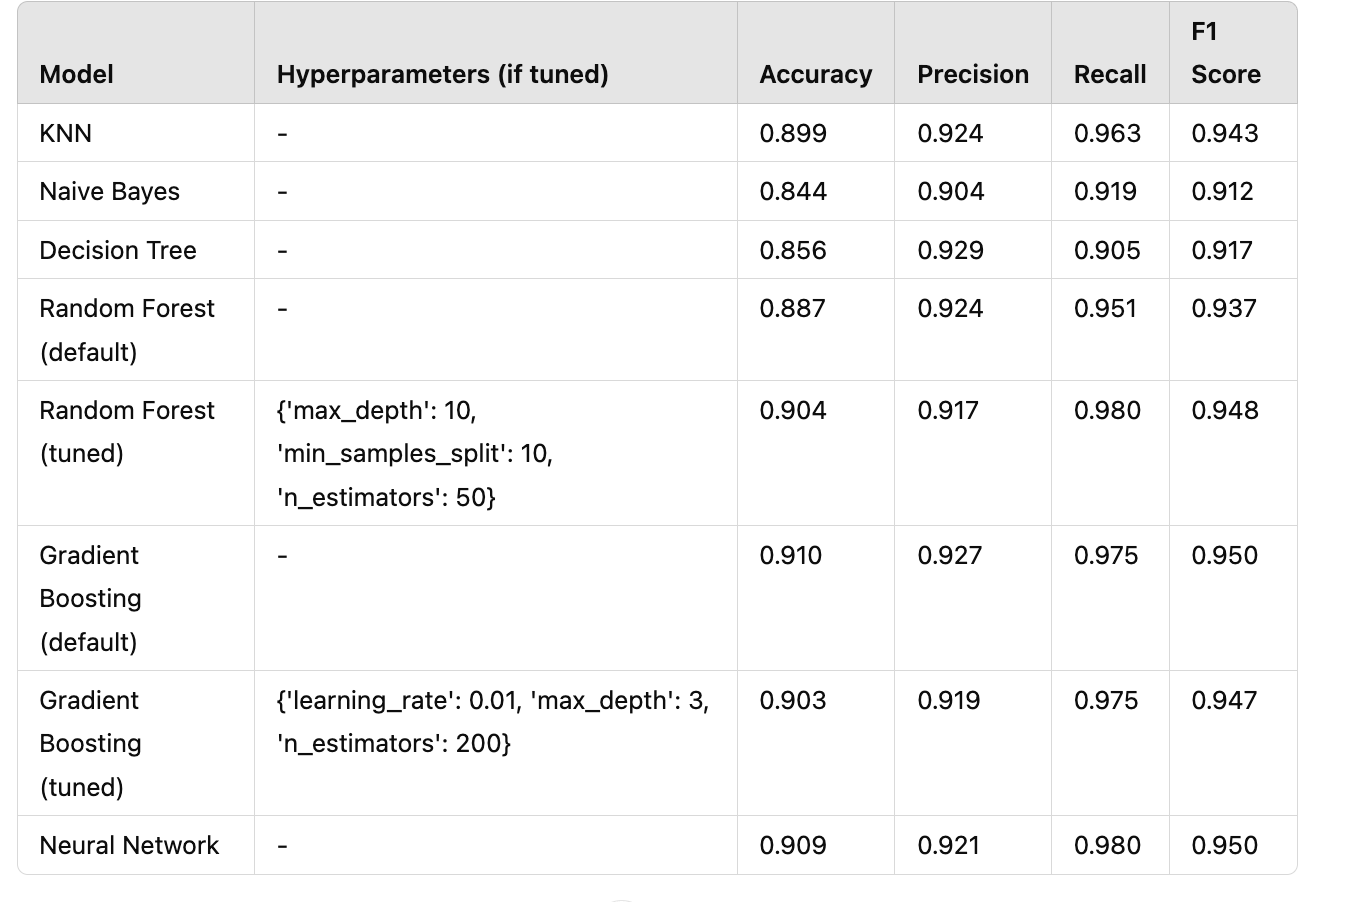

#Explanation of Results

Key Observations
Best Performing Model:

Gradient Boosting (default and tuned) and Neural Network achieved the highest F1 Scores (around 0.950), showing strong balance between precision and recall.
The tuned Random Forest model also performed well with a slightly lower F1 Score compared to Gradient Boosting and Neural Network.
Impact of Hyperparameter Tuning:

Random Forest: Tuning improved accuracy slightly (from 0.887 to 0.904) and also enhanced recall, indicating the model’s ability to identify positive cases improved with the tuning.
Gradient Boosting: The tuned model provided a slight improvement in recall compared to the default model, though the difference was minimal, indicating that Gradient Boosting already performed well with default parameters.
Feature Importance:

In both Random Forest and Gradient Boosting models, features like Survival Months, Age, Progesterone Status, and Tumor Size were among the most important. This aligns with clinical insights, as these are significant predictors of breast cancer survivability.
Conclusion
The models developed were able to answer the initial question of predicting breast cancer survivability with reasonable accuracy. The Gradient Boosting and Neural Network models provided the best results overall, with high precision, recall, and F1 scores, indicating robust performance.

These results demonstrate that machine learning models, particularly ensemble methods like Gradient Boosting and Random Forest, as well as Neural Networks, can effectively classify survivability in breast cancer patients. Further tuning or advanced model selection may yield even better performance, but the current models show promise in this application.

# Identifying Key Features

In [47]:
import pandas as pd

# Feature importance for Random Forest
rf_best_model = rf_grid_search.best_estimator_
rf_feature_importance = pd.Series(rf_best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features for Random Forest
print("Top features for Random Forest:\n", rf_feature_importance.head(10))

# Feature importance for Gradient Boosting
gb_best_model = gb_grid_search.best_estimator_
gb_feature_importance = pd.Series(gb_best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features for Gradient Boosting
print("Top features for Gradient Boosting:\n", gb_feature_importance.head(10))


Top features for Random Forest:
 Survival Months                 0.575489
Age                             0.044942
N Stage_N1                      0.026698
Progesterone Status_Negative    0.024016
Progesterone Status_Positive    0.022308
Tumor Size                      0.021775
Marital Status_Married          0.015807
T Stage _T1                     0.014091
Estrogen Status_Negative        0.013513
N Stage_N3                      0.012908
dtype: float64
Top features for Gradient Boosting:
 Survival Months                 0.805935
Age                             0.059758
Progesterone Status_Positive    0.033106
Progesterone Status_Negative    0.017857
N Stage_N1                      0.010631
6th Stage_IIA                   0.010419
Race_Other                      0.007904
N Stage_N3                      0.007028
6th Stage_IIIC                  0.007027
Regional Node Examined          0.006413
dtype: float64


# Key Features
1. Survival Months: This feature is the most important for both models, which makes sense as it directly correlates with the survivability rate.

2. Age: Age is consistently important across both models, indicating it’s a significant predictor of survivability.
3. Progesterone Status (Positive/Negative): Both models identify the status of progesterone as a key factor, which aligns with medical research suggesting that hormone receptor status can impact cancer outcomes.
4. Tumor Size: This feature is relatively important in the Random Forest model, as larger tumors are often associated with lower survivability.
5. Stage Indicators (N Stage, 6th Stage): The stage of cancer (particularly N Stage for lymph nodes and 6th Stage) is influential, indicating the severity and spread of cancer significantly impact survivability.